In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data

Data were loaded and cleaned. The cleaning process included getting rid of the punctuation marks and converting the texts into lower case.

In [2]:
import string

titles = pd.read_csv("./data/medium_post_titles.csv")
titles.drop(columns=["subtitle", "subtitle_truncated_flag"], inplace=True)

titles.title = titles.title.str.replace('[{}]'.format(string.punctuation), '').str.lower()
titles.title = titles.title.str.replace('‘', '')
titles.title = titles.title.str.replace('’', '')
titles.title = titles.title.str.replace('“', '')
titles.title = titles.title.str.replace('”', '')
titles.title = titles.title.str.replace('—', '')

titles.head()

,category,title
0,work,21 conversations a fun and easy game for team...
1,spirituality,biblical porn at mars hill
2,lgbtqia,cisgender is that a disease
3,equality,call me nat love black cowboys and the frontie...
4,artificial-intelligence,can i train my model on your computer


20% of the data were held out for testing.

In [3]:
from sklearn.model_selection import train_test_split

titles_train, titles_test = train_test_split(titles, train_size=0.8, stratify=titles.category.values)

X_train = titles_train.title.values
X_test = titles_test.title.values

y_train = titles_train.category.values
y_test = titles_test.category.values

# Tokenization and vectorization

Use TF-IDF to perform bag-of-words vetorization.

We adopted the Penn Treebank Tokenizer. We did not want to include n-grams because it will significantly increase the size of the vocabulary. Terms that appear less than twice or occur in more than 10% of the docuemnts are rejected. This choice is made based on experience extracting features for a naive Bayes model.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

tokenizer = TreebankWordTokenizer()
vectorizer = TfidfVectorizer(tokenizer=tokenizer.tokenize, ngram_range=(1, 1), stop_words='english', min_df=2, max_df=0.1)

XMatrix_train = vectorizer.fit_transform(X_train)
vocabulary = np.array(vectorizer.get_feature_names())

XMatrix_test = vectorizer.transform(X_test)

In [5]:
vocabularySize = vocabulary.size
print("Number of terms in the vocabulary: {}".format(vocabularySize))

Number of terms in the vocabulary: 22331


# Neural network

Using the ADAM optimizer to train a multilayer perception network with early stopping according to accuracy of the model tested on a validation set of 10% of the training data, we experimented on network architectures while tuning the L2 penalty rate, alpha, of the network.

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import time

classifier0 = MLPClassifier(hidden_layer_sizes=(256, 256), activation="relu", alpha=0.001, solver="adam", learning_rate_init=0.01, early_stopping=True, n_iter_no_change=50, max_iter=500, verbose=True)
start_time = time.time()
classifier0.fit(XMatrix_train, y_train)
end_time = time.time()
print("Time elapsed during training: {}".format(end_time - start_time))

accuracy_train = classifier0.score(XMatrix_train, y_train)
print("Accuracy on training set = {}".format(accuracy_train))

accuracy_test = classifier0.score(XMatrix_test, y_test)
print("Accuracy on test set = {}".format(accuracy_test))

Iteration 1, loss = 2.99435534
Validation score: 0.382836
Iteration 2, loss = 2.13933016
Validation score: 0.373047
Iteration 3, loss = 1.58369819
Validation score: 0.360095
Iteration 4, loss = 1.24130904
Validation score: 0.338837
Iteration 5, loss = 1.07320720
Validation score: 0.331718
Iteration 6, loss = 1.02326850
Validation score: 0.328653
Iteration 7, loss = 1.01810315
Validation score: 0.326379
Iteration 8, loss = 1.00146281
Validation score: 0.323907
Iteration 9, loss = 0.97545773
Validation score: 0.321732
Iteration 10, loss = 0.97263526
Validation score: 0.315998
Iteration 11, loss = 0.94006560
Validation score: 0.316294
Iteration 12, loss = 0.92179999
Validation score: 0.314910
Iteration 13, loss = 0.93093807
Validation score: 0.310065
Iteration 14, loss = 0.93836088
Validation score: 0.314317
Iteration 15, loss = 0.92780086
Validation score: 0.305319
Iteration 16, loss = 0.91571432
Validation score: 0.306704
Iteration 17, loss = 0.89173389
Validation score: 0.304133
Iterat

We first used a network with two hidden layers, and each layer has 256 units. Alpha was set as 0.001. During training, relatively fast-decreasing loss was ovserved. However, the validation accuracy drops steadily as well. This led to speculation of regularization being too weak. Thus, we decided to increase alpha to 0.01.

In [6]:
classifier1 = MLPClassifier(hidden_layer_sizes=(256, 256), activation="relu", alpha=0.01, solver="adam", learning_rate_init=0.01, early_stopping=True, n_iter_no_change=50, max_iter=500, verbose=True)
start_time = time.time()
classifier1.fit(XMatrix_train, y_train)
end_time = time.time()
print("Time elapsed during training: {}".format(end_time - start_time))

accuracy_train = classifier1.score(XMatrix_train, y_train)
print("Accuracy on training set = {}".format(accuracy_train))

accuracy_test = classifier1.score(XMatrix_test, y_test)
print("Accuracy on test set = {}".format(accuracy_test))

Iteration 1, loss = 3.44228735
Validation score: 0.379968
Iteration 2, loss = 3.21339609
Validation score: 0.388570
Iteration 3, loss = 3.09765100
Validation score: 0.380364
Iteration 4, loss = 2.97021355
Validation score: 0.375124
Iteration 5, loss = 2.85341423
Validation score: 0.363160
Iteration 6, loss = 2.74472101
Validation score: 0.365533
Iteration 7, loss = 2.64772548
Validation score: 0.352383
Iteration 8, loss = 2.58002803
Validation score: 0.352383
Iteration 9, loss = 2.50808899
Validation score: 0.348428
Iteration 10, loss = 2.46322336
Validation score: 0.345165
Iteration 11, loss = 2.41395544
Validation score: 0.345561
Iteration 12, loss = 2.37879200
Validation score: 0.341012
Iteration 13, loss = 2.35254766
Validation score: 0.334783
Iteration 14, loss = 2.31838117
Validation score: 0.334783
Iteration 15, loss = 2.29536896
Validation score: 0.333399
Iteration 16, loss = 2.27452144
Validation score: 0.332411
Iteration 17, loss = 2.27155913
Validation score: 0.327961
Iterat

In [7]:
classifier2 = MLPClassifier(hidden_layer_sizes=(512, 512), activation="relu", alpha=0.01, solver="adam", learning_rate_init=0.01, early_stopping=True, n_iter_no_change=50, max_iter=500, verbose=True)
start_time = time.time()
classifier2.fit(XMatrix_train, y_train)
end_time = time.time()
print("Time elapsed during training: {}".format(end_time - start_time))

accuracy_train = classifier2.score(XMatrix_train, y_train)
print("Accuracy on training set = {}".format(accuracy_train))

accuracy_test = classifier2.score(XMatrix_test, y_test)
print("Accuracy on test set = {}".format(accuracy_test))

Iteration 1, loss = 3.62683212
Validation score: 0.360985
Iteration 2, loss = 3.42573623
Validation score: 0.368301
Iteration 3, loss = 3.25107264
Validation score: 0.375519
Iteration 4, loss = 3.08569661
Validation score: 0.367016
Iteration 5, loss = 2.93462190
Validation score: 0.356535
Iteration 6, loss = 2.81153975
Validation score: 0.360490
Iteration 7, loss = 2.69678458
Validation score: 0.348922
Iteration 8, loss = 2.61283513
Validation score: 0.344868
Iteration 9, loss = 2.53345747
Validation score: 0.341803
Iteration 10, loss = 2.49037918
Validation score: 0.339529
Iteration 11, loss = 2.43139282
Validation score: 0.337849
Iteration 12, loss = 2.38978954
Validation score: 0.331323
Iteration 13, loss = 2.36026274
Validation score: 0.332905
Iteration 14, loss = 2.33559499
Validation score: 0.338738
Iteration 15, loss = 2.30160096
Validation score: 0.330433
Iteration 16, loss = 2.29202380
Validation score: 0.333597
Iteration 17, loss = 2.26387380
Validation score: 0.327269
Iterat

Setting the alpha to be 0.01, we used varied the size the two-hidden layer network. A training accuracy of 60% and test accuracy 38% were achieved when each layer has 256 units. A training accuracy of 62% and test accuracy 37% was achieved when each layer has 512 units. As the training still suffered a constant deterioration of validation accuracy, and the training accuracy is significanly better than the test accuracy, we decided to try heavier L2 penalty.

In [10]:
classifier3 = MLPClassifier(hidden_layer_sizes=(256, 256), activation="relu", alpha=0.1, solver="adam", learning_rate_init=0.01, early_stopping=True, n_iter_no_change=50, max_iter=500, verbose=True)
start_time = time.time()
classifier3.fit(XMatrix_train, y_train)
end_time = time.time()
print("Time elapsed during training: {}".format(end_time - start_time))

accuracy_train = classifier3.score(XMatrix_train, y_train)
print("Accuracy on training set = {}".format(accuracy_train))

accuracy_test = classifier3.score(XMatrix_test, y_test)
print("Accuracy on test set = {}".format(accuracy_test))

Iteration 1, loss = 4.18235336
Validation score: 0.291972
Iteration 2, loss = 3.89523602
Validation score: 0.321238
Iteration 3, loss = 3.68141209
Validation score: 0.346055
Iteration 4, loss = 3.56066088
Validation score: 0.343385
Iteration 5, loss = 3.49189809
Validation score: 0.347340
Iteration 6, loss = 3.44591428
Validation score: 0.357821
Iteration 7, loss = 3.41301866
Validation score: 0.351196
Iteration 8, loss = 3.39242118
Validation score: 0.355547
Iteration 9, loss = 3.37250633
Validation score: 0.366225
Iteration 10, loss = 3.35737206
Validation score: 0.363358
Iteration 11, loss = 3.34500243
Validation score: 0.365928
Iteration 12, loss = 3.33723948
Validation score: 0.361875
Iteration 13, loss = 3.33329662
Validation score: 0.364149
Iteration 14, loss = 3.32497182
Validation score: 0.361380
Iteration 15, loss = 3.32298729
Validation score: 0.358414
Iteration 16, loss = 3.31961377
Validation score: 0.362567
Iteration 17, loss = 3.31408753
Validation score: 0.367115
Iterat

Iteration 140, loss = 3.24501656
Validation score: 0.370872
Iteration 141, loss = 3.24962207
Validation score: 0.374926
Iteration 142, loss = 3.24680098
Validation score: 0.375025
Iteration 143, loss = 3.24769607
Validation score: 0.372256
Iteration 144, loss = 3.24723628
Validation score: 0.372454
Iteration 145, loss = 3.24673137
Validation score: 0.375321
Iteration 146, loss = 3.24416987
Validation score: 0.376706
Iteration 147, loss = 3.24307616
Validation score: 0.367313
Iteration 148, loss = 3.24658468
Validation score: 0.369389
Iteration 149, loss = 3.24410796
Validation score: 0.373542
Iteration 150, loss = 3.24270008
Validation score: 0.372553
Iteration 151, loss = 3.24631435
Validation score: 0.373344
Iteration 152, loss = 3.24543560
Validation score: 0.373245
Validation score did not improve more than tol=0.000100 for 50 consecutive epochs. Stopping.
Time elapsed during training: 9616.23010802269
Accuracy on training set = 0.49558012142306246
Accuracy on test set = 0.36703053

In [11]:
classifier4 = MLPClassifier(hidden_layer_sizes=(256, 256), activation="relu", alpha=1, solver="adam", learning_rate_init=0.01, early_stopping=True, n_iter_no_change=50, max_iter=500, verbose=True)
start_time = time.time()
classifier4.fit(XMatrix_train, y_train)
end_time = time.time()
print("Time elapsed during training: {}".format(end_time - start_time))

accuracy_train = classifier4.score(XMatrix_train, y_train)
print("Accuracy on training set = {}".format(accuracy_train))

accuracy_test = classifier4.score(XMatrix_test, y_test)
print("Accuracy on test set = {}".format(accuracy_test))

Iteration 1, loss = 4.23702543
Validation score: 0.039154
Iteration 2, loss = 4.17247619
Validation score: 0.040538
Iteration 3, loss = 4.16299012
Validation score: 0.042812
Iteration 4, loss = 4.16191542
Validation score: 0.042812
Iteration 5, loss = 4.16096917
Validation score: 0.040538
Iteration 6, loss = 4.16186152
Validation score: 0.042812
Iteration 7, loss = 4.16232023
Validation score: 0.042812
Iteration 8, loss = 4.16133151
Validation score: 0.042812
Iteration 9, loss = 4.16221901
Validation score: 0.040538
Iteration 10, loss = 4.16237711
Validation score: 0.042812
Iteration 11, loss = 4.16220261
Validation score: 0.040538
Iteration 12, loss = 4.16234511
Validation score: 0.040538
Iteration 13, loss = 4.16219251
Validation score: 0.040538
Iteration 14, loss = 4.16224443
Validation score: 0.040538
Iteration 15, loss = 4.16208030
Validation score: 0.042812
Iteration 16, loss = 4.16217323
Validation score: 0.040538
Iteration 17, loss = 4.16226745
Validation score: 0.040538
Iterat

Using a network two hidden layers, each of which has 256 units, we tested alpha of 0.1 and 1. An alpha of 1 caused both the trainig and test accuracy to drop to 4%, while an alpha of 0.1 generated a training accuracy of 50% and a test accuracy of 37%. This indicated that alpha=0.1 might be an moderately optimal choice.

In [13]:
classifier5 = MLPClassifier(hidden_layer_sizes=(512, 512), activation="relu", alpha=0.1, solver="adam", learning_rate_init=0.01, early_stopping=True, n_iter_no_change=50, max_iter=500, verbose=True)
start_time = time.time()
classifier5.fit(XMatrix_train, y_train)
end_time = time.time()
print("Time elapsed during training: {}".format(end_time - start_time))

accuracy_train = classifier5.score(XMatrix_train, y_train)
print("Accuracy on training set = {}".format(accuracy_train))

accuracy_test = classifier5.score(XMatrix_test, y_test)
print("Accuracy on test set = {}".format(accuracy_test))

Iteration 1, loss = 4.27127844
Validation score: 0.311351
Iteration 2, loss = 3.90626242
Validation score: 0.340914
Iteration 3, loss = 3.70496264
Validation score: 0.353767
Iteration 4, loss = 3.59152218
Validation score: 0.356140
Iteration 5, loss = 3.52087782
Validation score: 0.354261
Iteration 6, loss = 3.47222261
Validation score: 0.367115
Iteration 7, loss = 3.43531815
Validation score: 0.369488
Iteration 8, loss = 3.40695582
Validation score: 0.363358
Iteration 9, loss = 3.38602528
Validation score: 0.370180
Iteration 10, loss = 3.37195164
Validation score: 0.367510
Iteration 11, loss = 3.35914328
Validation score: 0.372948
Iteration 12, loss = 3.34882479
Validation score: 0.376508
Iteration 13, loss = 3.34200630
Validation score: 0.372059
Iteration 14, loss = 3.33601224
Validation score: 0.376903
Iteration 15, loss = 3.33353901
Validation score: 0.374629
Iteration 16, loss = 3.32711364
Validation score: 0.381550
Iteration 17, loss = 3.31970751
Validation score: 0.373937
Iterat

In [14]:
classifier6 = MLPClassifier(hidden_layer_sizes=(512, 256), activation="relu", alpha=0.1, solver="adam", learning_rate_init=0.01, early_stopping=True, n_iter_no_change=50, max_iter=500, verbose=True)
start_time = time.time()
classifier6.fit(XMatrix_train, y_train)
end_time = time.time()
print("Time elapsed during training: {}".format(end_time - start_time))

accuracy_train = classifier6.score(XMatrix_train, y_train)
print("Accuracy on training set = {}".format(accuracy_train))

accuracy_test = classifier6.score(XMatrix_test, y_test)
print("Accuracy on test set = {}".format(accuracy_test))

Iteration 1, loss = 4.33983456
Validation score: 0.300178
Iteration 2, loss = 3.91665261
Validation score: 0.325984
Iteration 3, loss = 3.67066247
Validation score: 0.347439
Iteration 4, loss = 3.55718137
Validation score: 0.348823
Iteration 5, loss = 3.49016415
Validation score: 0.352185
Iteration 6, loss = 3.44158411
Validation score: 0.360688
Iteration 7, loss = 3.40638353
Validation score: 0.363753
Iteration 8, loss = 3.38033900
Validation score: 0.353372
Iteration 9, loss = 3.36086867
Validation score: 0.364050
Iteration 10, loss = 3.34365546
Validation score: 0.366225
Iteration 11, loss = 3.33013487
Validation score: 0.365533
Iteration 12, loss = 3.32450360
Validation score: 0.368796
Iteration 13, loss = 3.32078253
Validation score: 0.366719
Iteration 14, loss = 3.31007056
Validation score: 0.367708
Iteration 15, loss = 3.31030459
Validation score: 0.371366
Iteration 16, loss = 3.30623403
Validation score: 0.361281
Iteration 17, loss = 3.30158289
Validation score: 0.363259
Iterat

In [16]:
classifier7 = MLPClassifier(hidden_layer_sizes=(512, 512, 512), activation="relu", alpha=0.1, solver="adam", learning_rate_init=0.01, early_stopping=True, n_iter_no_change=50, max_iter=500, verbose=True)
start_time = time.time()
classifier7.fit(XMatrix_train, y_train)
end_time = time.time()
print("Time elapsed during training: {}".format(end_time - start_time))

accuracy_train = classifier7.score(XMatrix_train, y_train)
print("Accuracy on training set = {}".format(accuracy_train))

accuracy_test = classifier7.score(XMatrix_test, y_test)
print("Accuracy on test set = {}".format(accuracy_test))

Iteration 1, loss = 4.10525278
Validation score: 0.276448
Iteration 2, loss = 3.83607504
Validation score: 0.323314
Iteration 3, loss = 3.66627918
Validation score: 0.340914
Iteration 4, loss = 3.55379528
Validation score: 0.340617
Iteration 5, loss = 3.47218914
Validation score: 0.345462
Iteration 6, loss = 3.40938193
Validation score: 0.346747
Iteration 7, loss = 3.36474130
Validation score: 0.357524
Iteration 8, loss = 3.33563503
Validation score: 0.362270
Iteration 9, loss = 3.31351301
Validation score: 0.353075
Iteration 10, loss = 3.28979690
Validation score: 0.360194
Iteration 11, loss = 3.26920132
Validation score: 0.371268
Iteration 12, loss = 3.25369694
Validation score: 0.361281
Iteration 13, loss = 3.24350401
Validation score: 0.357722
Iteration 14, loss = 3.23531020
Validation score: 0.359996
Iteration 15, loss = 3.22425542
Validation score: 0.364445
Iteration 16, loss = 3.22306407
Validation score: 0.363753
Iteration 17, loss = 3.21796927
Validation score: 0.371762
Iterat

We then tested 2 networks with the first layer having 512 units, while the second layer had either 512 or 256 units. Both network had similar performance with training accuracy being 49% and test accuracy being 37%. We also tested a three-layer network (512 units in each layer), which achieved similar performance.

# Evaluation

The above analysis showed the network with 2 hidden layers of 256 units and alpha = 0.1 was able to achieve equal performance as more sophisticated architectures. Although it did not render significantly better performance compared to the naive bayess model, it is understandable. Given both naive Bayes classifiers and multilayer perceptron networks adopted a bag-of-words model, it might be bottleneck to the performance of the classifiers.

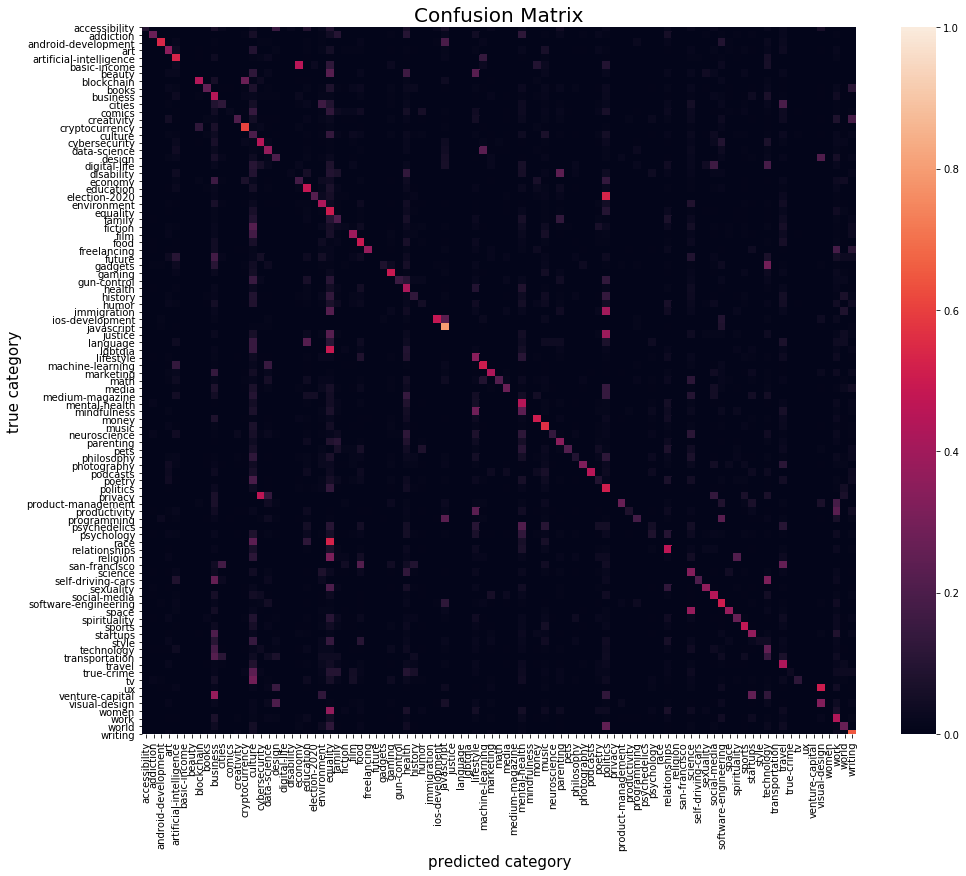

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plotConfusionMatrix(confusionMatrix, classes):
    
    heatmap_df = pd.DataFrame(confusionMatrix, index=classes, columns=classes)
    
    fig, ax = plt.subplots(figsize=(16,13))
    sns.heatmap(heatmap_df, xticklabels=True,yticklabels=True, ax=ax, vmin=0,vmax=1)
    ax.set_aspect("equal")
    plt.title("Confusion Matrix", fontsize=20)
    plt.ylabel("true category", fontsize=15)
    plt.xlabel("predicted category", fontsize=15)

classifier = classifier3

y_pred = classifier.predict(XMatrix_test)

category_list = unique_labels(y_test, y_pred)

cMatrix = confusion_matrix(y_test, y_pred, labels=category_list)
cMatrix = cMatrix.astype('float') / cMatrix.sum(axis=1)[:, np.newaxis]

plotConfusionMatrix(cMatrix, category_list)

Taking a closer look of the confusion matrix generated from the prediction result of the test set, we noticed there were some major pairs of misclassification, partly due to those involved category are tightly related -- _privacy_ misclassified as *cybersecurity*; _basic-income_ misclassified as *economy*; *election-2020*, _immigration_ and _justice_ misclassified as *politics*; _lgbtqia_ and _race_ misclassified as *equality*; _ux_ misclassified as _visual-design_...